In [1]:
import pandas as pd
t_data=pd.read_csv('C:/Users/samaresh yadav/Desktop/t_data.csv',parse_dates=['created_at'],index_col=['created_at'])

In [2]:
t_data[:5]

,user_id,sentiment_analysis,favorite_count
created_at,,,
2019-03-14 14:53:00,179145850,positive,2
2019-03-14 14:33:00,179145850,neutral,0
2019-03-14 14:33:00,179145850,neutral,0
2019-03-13 20:16:00,179145850,positive,0
2019-03-13 16:10:00,179145850,neutral,0


In [3]:
#after parsing the dates
t_data[:5]

,user_id,sentiment_analysis,favorite_count
created_at,,,
2019-03-14 14:53:00,179145850,positive,2
2019-03-14 14:33:00,179145850,neutral,0
2019-03-14 14:33:00,179145850,neutral,0
2019-03-13 20:16:00,179145850,positive,0
2019-03-13 16:10:00,179145850,neutral,0


In [4]:
t_data['2018-02-05']

,user_id,sentiment_analysis,favorite_count
created_at,,,
2018-02-05 16:00:00,179145850,positive,1


In [103]:
y=t_data.favorite_count.resample('M')

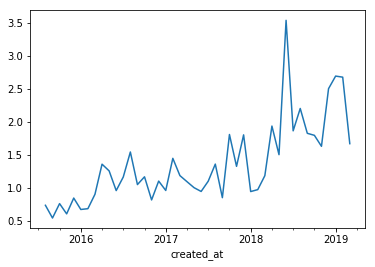

In [107]:
#you can also see the chart for this data into monthly frequencies
import matplotlib.pyplot as plt
%matplotlib inline
t_data.favorite_count.resample('MS').mean().plot()

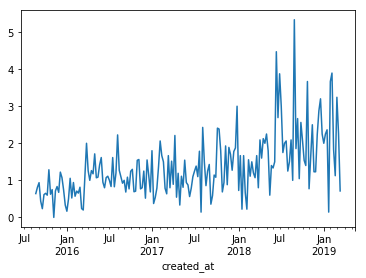

In [100]:
#you can also convert into weakly frequencies
t_data.favorite_count.resample('W').mean().plot()

In [25]:
t_data.Close.plot()

AttributeError: 'DataFrame' object has no attribute 'Close'

In [105]:
y=t_data.favorite_count.resample('MS').mean()

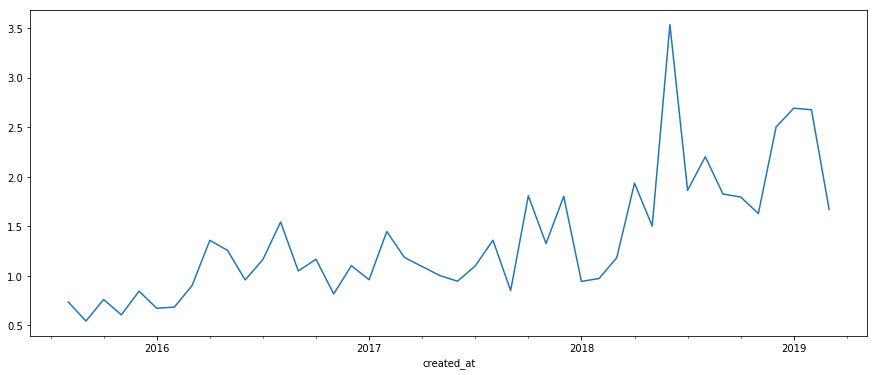

In [106]:
y.plot(figsize=(15, 6))
plt.show()

In [10]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.374572
p-value: 0.914259
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


In [11]:
rolmean=y.rolling(window=12).mean()

In [12]:
rolstd=y.rolling(window=12).std()
print(rolmean,rolstd)

created_at
2015-08-01         NaN
2015-09-01         NaN
2015-10-01         NaN
2015-11-01         NaN
2015-12-01         NaN
2016-01-01         NaN
2016-02-01         NaN
2016-03-01         NaN
2016-04-01         NaN
2016-05-01         NaN
2016-06-01         NaN
2016-07-01    0.871567
2016-08-01    0.938835
2016-09-01    0.981044
2016-10-01    1.014900
2016-11-01    1.032512
2016-12-01    1.053954
2017-01-01    1.077949
2017-02-01    1.141501
2017-03-01    1.165078
2017-04-01    1.142982
2017-05-01    1.121770
2017-06-01    1.120671
2017-07-01    1.115328
2017-08-01    1.100045
2017-09-01    1.083497
2017-10-01    1.136885
2017-11-01    1.179265
2017-12-01    1.237599
2018-01-01    1.236218
2018-02-01    1.196730
2018-03-01    1.196637
2018-04-01    1.266839
2018-05-01    1.308506
2018-06-01    1.524508
2018-07-01    1.588098
2018-08-01    1.658336
2018-09-01    1.739589
2018-10-01    1.738552
2018-11-01    1.763851
2018-12-01    1.822184
2019-01-01    1.967959
2019-02-01    2.109923


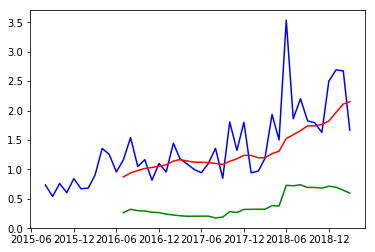

In [13]:
#plotting rolling statistics
orig=plt.plot(y,color='blue',label='original')
mean=plt.plot(rolmean,color='red',label='rollingmean')
std=plt.plot(rolstd,color='green',label='rollingstd')


so blue line is my original data
so over here you can conclude that mean and std are not constant
so here data is not in stationary
Now let me perform that Dicky Fuller test

In [14]:
# Dicky Fuller test
from pandas import Series
from statsmodels.tsa.stattools import adfuller
#series = Series.from_csv('daily-total-female-births.csv', header=0)
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -0.374572
p-value: 0.914259
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


here the null hypothesis says the p value always less.
so here we have very large value that is 0.9.
so here we cannot reject the null hypothesis and we can say the data is not in stationary

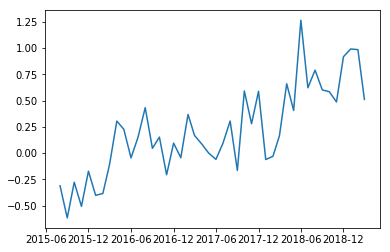

In [15]:
#Estimating Trend
import numpy as np
y_logscale=np.log(y)
plt.plot(y_logscale)

so here the numbers on y-axis has changed because the scale itself changed that.
your trends remains same where value of y has changed.

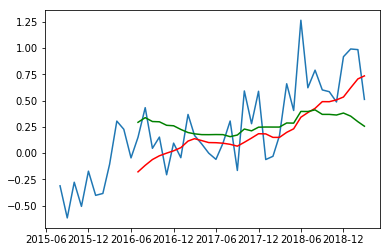

In [16]:
moving_avg=y_logscale.rolling(window=12).mean()
moving_std=y_logscale.rolling(window=12).std()
plt.plot(y_logscale)
plt.plot(moving_avg,color='red')
plt.plot(moving_std,color='green')

now the mean and std  is not in stationary it is quite better than previous one.

In [17]:
datalogscaleMavg=y_logscale-moving_avg

In [18]:
datalogscaleMavg.dropna(inplace=True)

the reason why we are performing this transformations to become data as stationary

In [19]:
datalogscaleMavg[:5]

created_at
2016-07-01    0.327842
2016-08-01    0.547836
2016-09-01    0.106590
2016-10-01    0.177494
2016-11-01   -0.205329
Freq: MS, Name: favorite_count, dtype: float64

Now im testing the data is stationary or not. using Dicky fuller test

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    moving_avg=timeseries.rolling(window=12).mean()
    moving_std=timeseries.rolling(window=12).std()
    #plotting rolling statistics
    plt.figure(figsize=(10,5))
    orig=plt.plot(timeseries,color='blue',label='original')
    mean=plt.plot(moving_avg,color='red',label='mean')
    std=plt.plot(moving_std,color='green',label='std')
    #Dicky fuller test
    print('Result of Dickyfullertest')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test_stats','P-value','#lagsused','No of Observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical values(%s)'%key]=value
    print(dfoutput)    

Result of Dickyfullertest
Test_stats              -3.668741
P-value                  0.004575
#lagsused                2.000000
No of Observations      30.000000
Critical values(1%)     -3.669920
Critical values(5%)     -2.964071
Critical values(10%)    -2.621171
dtype: float64


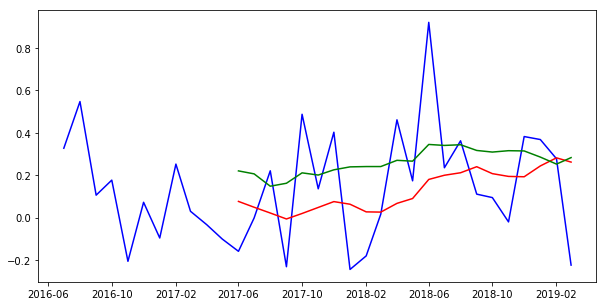

In [21]:
test_stationarity(datalogscaleMavg)

so here we are noticed that p value is less.
in early cases p value is large.
if you noticed that critical value and test statistic value is almost equal. its basically help you weather your data is stationary data or not.
By this transformations we know how to perform data into stationarty 

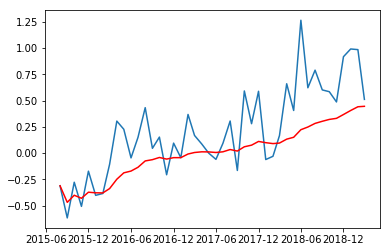

In [23]:
exponentialdecayweightedAvg=y_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(y_logscale)
plt.plot(exponentialdecayweightedAvg,color='red')

so why i have done this, because you need to see the trend inside the timeseries.
from the graph you can see that as the timeseries is progressive the avg also progressive towards high.
so here the trend is upward and its keeps on increasing with respect to time.

Result of Dickyfullertest
Test_stats              -3.558112
P-value                  0.006614
#lagsused                2.000000
No of Observations      41.000000
Critical values(1%)     -3.600983
Critical values(5%)     -2.935135
Critical values(10%)    -2.605963
dtype: float64


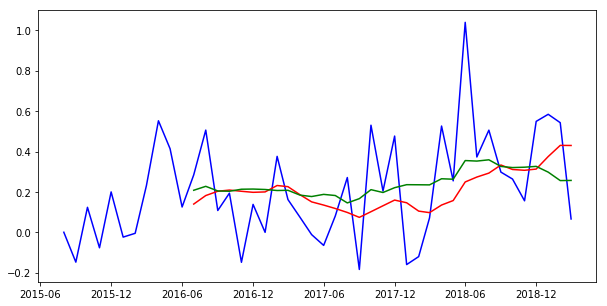

In [24]:
datalogscaleMovingExponentialDecayAvg=y_logscale-exponentialdecayweightedAvg
test_stationarity(datalogscaleMovingExponentialDecayAvg)

over here you noticed that your std is quite flat it is not moving so much.
Now we know that our data is stationary.

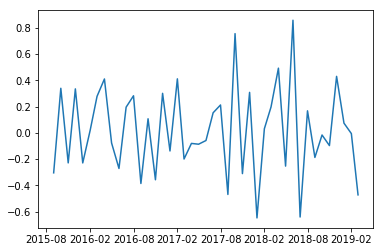

In [25]:
datalogdiffshifting=y_logscale-y_logscale.shift()
plt.plot(datalogdiffshifting)

Now we are doing shifting the values into timeseries so we can use the values in forecasting.
here we use the function called shift to shift all the values.
here we shift the values by lag(1) or differentiated by 1.

Result of Dickyfullertest
Test_stats              -4.087427
P-value                  0.001016
#lagsused                6.000000
No of Observations      36.000000
Critical values(1%)     -3.626652
Critical values(5%)     -2.945951
Critical values(10%)    -2.611671
dtype: float64


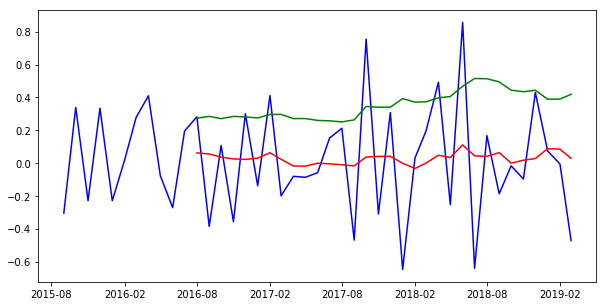

In [26]:
datalogdiffshifting.dropna(inplace=True)
test_stationarity(datalogdiffshifting)

here you can say that timeseries in stationary

# Components of timeseries
trends
seasonality
residual

Result of Dickyfullertest
Test_stats              -4.558087
P-value                  0.000154
#lagsused                3.000000
No of Observations      28.000000
Critical values(1%)     -3.688926
Critical values(5%)     -2.971989
Critical values(10%)    -2.625296
dtype: float64


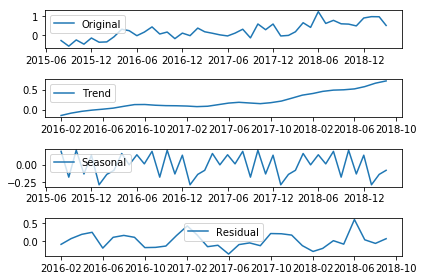

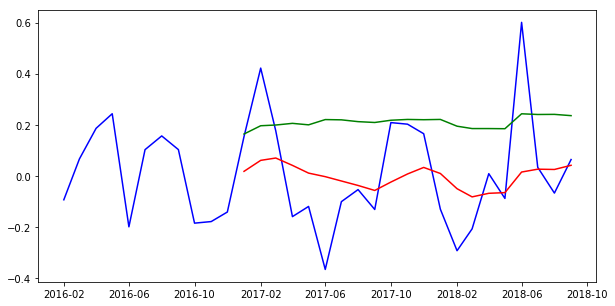

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(y_logscale)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
plt.subplot(411)
plt.plot(y_logscale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')
plt.tight_layout()
decomposedLogdata=residual
decomposedLogdata.dropna(inplace=True)
test_stationarity(decomposedLogdata)

now we know the value of d and we need to calculate p and q i.e., the value of autoregressive lag and value of moving average
so from below we need to plot ACF graph and PACF graph
inorder to calculate the values of P we need to do PACF and for Q is ACF

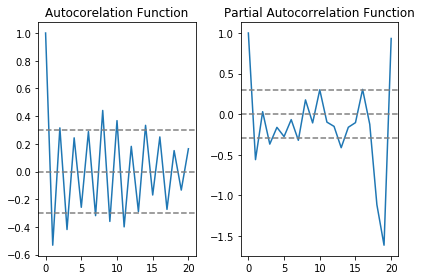

In [36]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(datalogdiffshifting,nlags=20)
lag_pacf=pacf(datalogdiffshifting,nlags=20,method='ols')
#plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datalogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datalogdiffshifting)),linestyle='--',color='gray')
plt.title('Autocorelation Function')
#plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datalogdiffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datalogdiffshifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

so this is my autocorrelation graph and parital autocorelation graph
so now we order to calculate p and q value we need to check that where the graph drops to zero at first position
from graphs p=1 and q=1
now we submit the p and q values in ARIMA model

plotting AR model


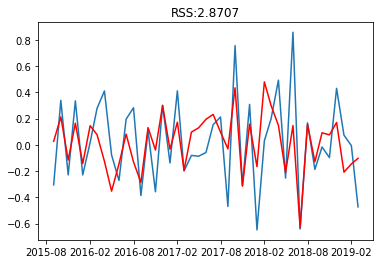

In [70]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(y_logscale,order=(2,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(datalogdiffshifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_ARIMA.fittedvalues-datalogdiffshifting)**2))
print('plotting AR model')

plotting AR model


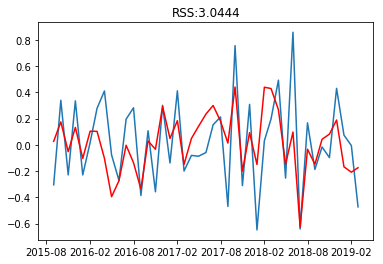

In [67]:
model=ARIMA(y_logscale,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datalogdiffshifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_MA.fittedvalues-datalogdiffshifting)**2))
print('plotting AR model')

plotting AR model


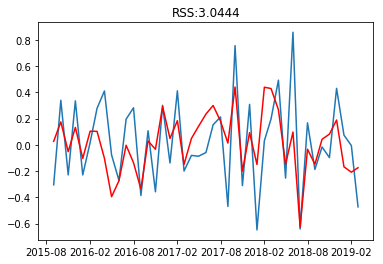

In [68]:
model=ARIMA(y_logscale,order=(0,1,2))
results_AR=model.fit(disp=-1)
plt.plot(datalogdiffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_AR.fittedvalues-datalogdiffshifting)**2))
print('plotting AR model')

In [71]:
predARIMAdiff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predARIMAdiff)

created_at
2015-09-01    0.026501
2015-10-01    0.212088
2015-11-01   -0.116331
2015-12-01    0.164479
2016-01-01   -0.143026
2016-02-01    0.145185
2016-03-01    0.076925
2016-04-01   -0.125631
2016-05-01   -0.353097
2016-06-01   -0.146016
2016-07-01    0.081298
2016-08-01   -0.130550
2016-09-01   -0.286729
2016-10-01    0.131170
2016-11-01   -0.039981
2016-12-01    0.299340
2017-01-01   -0.033863
2017-02-01    0.171800
2017-03-01   -0.194339
2017-04-01    0.096741
2017-05-01    0.129045
2017-06-01    0.193932
2017-07-01    0.231494
2017-08-01    0.097268
2017-09-01   -0.031134
2017-10-01    0.433895
2017-11-01   -0.314864
2017-12-01    0.157126
2018-01-01   -0.166447
2018-02-01    0.479386
2018-03-01    0.299664
2018-04-01    0.147863
2018-05-01   -0.210649
2018-06-01    0.146538
2018-07-01   -0.631851
2018-08-01    0.154909
2018-09-01   -0.129194
2018-10-01    0.091481
2018-11-01    0.075404
2018-12-01    0.169787
2019-01-01   -0.208440
2019-02-01   -0.146279
2019-03-01   -0.103224


In [73]:
pred_cumsum=predARIMAdiff.cumsum()
print(pred_cumsum)

created_at
2015-09-01    0.026501
2015-10-01    0.238590
2015-11-01    0.122259
2015-12-01    0.286738
2016-01-01    0.143713
2016-02-01    0.288898
2016-03-01    0.365822
2016-04-01    0.240192
2016-05-01   -0.112905
2016-06-01   -0.258921
2016-07-01   -0.177623
2016-08-01   -0.308173
2016-09-01   -0.594902
2016-10-01   -0.463732
2016-11-01   -0.503713
2016-12-01   -0.204373
2017-01-01   -0.238236
2017-02-01   -0.066437
2017-03-01   -0.260775
2017-04-01   -0.164035
2017-05-01   -0.034990
2017-06-01    0.158942
2017-07-01    0.390436
2017-08-01    0.487704
2017-09-01    0.456571
2017-10-01    0.890466
2017-11-01    0.575602
2017-12-01    0.732728
2018-01-01    0.566281
2018-02-01    1.045667
2018-03-01    1.345331
2018-04-01    1.493194
2018-05-01    1.282545
2018-06-01    1.429082
2018-07-01    0.797231
2018-08-01    0.952140
2018-09-01    0.822947
2018-10-01    0.914428
2018-11-01    0.989832
2018-12-01    1.159619
2019-01-01    0.951179
2019-02-01    0.804900
2019-03-01    0.701676


In [76]:
pred_arima_log=pd.Series(y_logscale.ix[0],index=y_logscale.index)
pred_arima_log=pred_arima_log.add(pred_cumsum,fill_value=0)
pred_arima_log.head()

c:\users\samaresh yadav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


created_at
2015-08-01   -0.310155
2015-09-01   -0.283653
2015-10-01   -0.071565
2015-11-01   -0.187896
2015-12-01   -0.023417
Freq: MS, dtype: float64

In [77]:
predictions_ARIMA=np.exp(pred_arima_log)
predictions_ARIMA

created_at
2015-08-01    0.733333
2015-09-01    0.753028
2015-10-01    0.930936
2015-11-01    0.828701
2015-12-01    0.976855
2016-01-01    0.846672
2016-02-01    0.978967
2016-03-01    1.057246
2016-04-01    0.932428
2016-05-01    0.655039
2016-06-01    0.566048
2016-07-01    0.613989
2016-08-01    0.538845
2016-09-01    0.404519
2016-10-01    0.461217
2016-11-01    0.443141
2016-12-01    0.597782
2017-01-01    0.577879
2017-02-01    0.686196
2017-03-01    0.565000
2017-04-01    0.622389
2017-05-01    0.708118
2017-06-01    0.859665
2017-07-01    1.083591
2017-08-01    1.194287
2017-09-01    1.157677
2017-10-01    1.786594
2017-11-01    1.304013
2017-12-01    1.525882
2018-01-01    1.291915
2018-02-01    2.086550
2018-03-01    2.815603
2018-04-01    3.264281
2018-05-01    2.644256
2018-06-01    3.061569
2018-07-01    1.627550
2018-08-01    1.900250
2018-09-01    1.669947
2018-10-01    1.829921
2018-11-01    1.973240
2018-12-01    2.338392
2019-01-01    1.898424
2019-02-01    1.640080


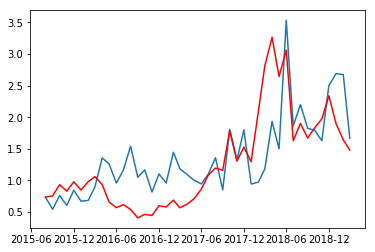

In [78]:
plt.plot(y)
plt.plot(predictions_ARIMA,color='red')

In [79]:
y

created_at
2015-08-01    0.733333
2015-09-01    0.540541
2015-10-01    0.758621
2015-11-01    0.603175
2015-12-01    0.842697
2016-01-01    0.669811
2016-02-01    0.681818
2016-03-01    0.900000
2016-04-01    1.356061
2016-05-01    1.254545
2016-06-01    0.956044
2016-07-01    1.162162
2016-08-01    1.540541
2016-09-01    1.047059
2016-10-01    1.164894
2016-11-01    0.814516
2016-12-01    1.100000
2017-01-01    0.957746
2017-02-01    1.444444
2017-03-01    1.182927
2017-04-01    1.090909
2017-05-01    1.000000
2017-06-01    0.942857
2017-07-01    1.098039
2017-08-01    1.357143
2017-09-01    0.848485
2017-10-01    1.805556
2017-11-01    1.323077
2017-12-01    1.800000
2018-01-01    0.941176
2018-02-01    0.970588
2018-03-01    1.181818
2018-04-01    1.933333
2018-05-01    1.500000
2018-06-01    3.534884
2018-07-01    1.861111
2018-08-01    2.200000
2018-09-01    1.823529
2018-10-01    1.793103
2018-11-01    1.626667
2018-12-01    2.500000
2019-01-01    2.690476
2019-02-01    2.674157


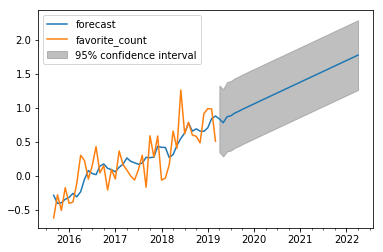

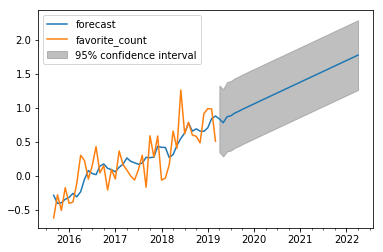

In [93]:
results_ARIMA.plot_predict(1,80)
#x=results_ARIMA.forecast(steps=1)